In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:\\Users\\maganti akshita\\Downloads\\archive\\signal_metrics.csv')
print(df)

                        Timestamp           Locality   Latitude  Longitude  \
0      2023-05-05 12:50:40.000000           Anisabad  25.599109  85.137355   
1      2023-05-05 12:53:47.210173        Fraser Road  25.433286  85.070053   
2      2023-05-05 12:56:54.420346  Boring Canal Road  25.498809  85.211371   
3      2023-05-05 13:00:01.630519            Danapur  25.735138  85.208400   
4      2023-05-05 13:03:08.840692    Phulwari Sharif  25.538556  85.159860   
...                           ...                ...        ...        ...   
16824  2023-06-10 23:44:23.950552        Pataliputra  25.542846  85.129611   
16825  2023-06-10 23:47:31.160725  Boring Canal Road  25.724624  85.233365   
16826  2023-06-10 23:50:38.370898        Boring Road  25.574020  85.030036   
16827  2023-06-10 23:53:45.581071        Boring Road  25.619325  85.183155   
16828  2023-06-10 23:56:52.791244     Rajendra Nagar  25.682516  85.264655   

       Signal Strength (dBm)  Signal Quality (%)  Data Throughp

In [3]:
import numpy as np

# Assuming you have two classes: Class A and Class B, and their feature vectors are stored in separate arrays
class_a_data = df['Longitude']
class_b_data = df['Data Throughput (Mbps)']

# Calculate the mean (class centroid) for each class
mean_class_a = np.mean(class_a_data, axis=0)
mean_class_b = np.mean(class_b_data, axis=0)

# Calculate the intraclass spread for each class (variance)
variance_class_a = np.var(class_a_data, axis=0)
variance_class_b = np.var(class_b_data, axis=0)

# Calculate the interclass distance between the two classes (Euclidean distance between centroids)
interclass_distance = np.linalg.norm(mean_class_a - mean_class_b)

print("Mean (Class A):", mean_class_a)
print("Mean (Class B):", mean_class_b)
print("Intraclass Spread (Class A):", variance_class_a)
print("Intraclass Spread (Class B):", variance_class_b)
print("Interclass Distance:", interclass_distance)

Mean (Class A): 85.13731402866502
Mean (Class B): 16.182855613636214
Intraclass Spread (Class A): 0.008116600249022193
Intraclass Spread (Class B): 660.5912868001252
Interclass Distance: 68.9544584150288


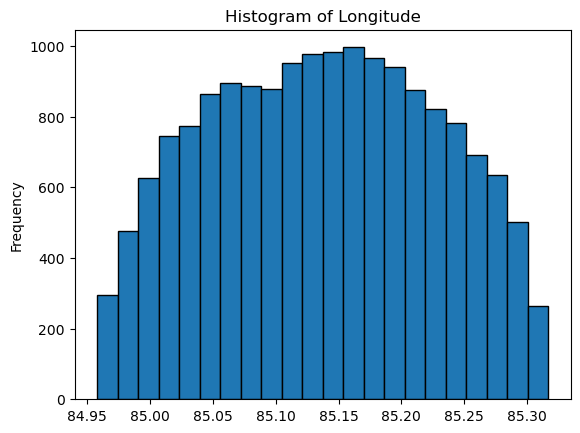

Mean Longitude: 85.13731402866502
Variance Longitude: 0.008116600249022193


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Longitude_data = df['Longitude']

num_bins = 22  

plt.hist(Longitude_data, bins=num_bins, edgecolor='k')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Histogram of Longitude')
plt.show()

mean_Longitude = np.mean(Longitude_data)
variance_Longitude = np.var(Longitude_data)

print(f"Mean Longitude: {mean_Longitude}")
print(f"Variance Longitude: {variance_Longitude}")

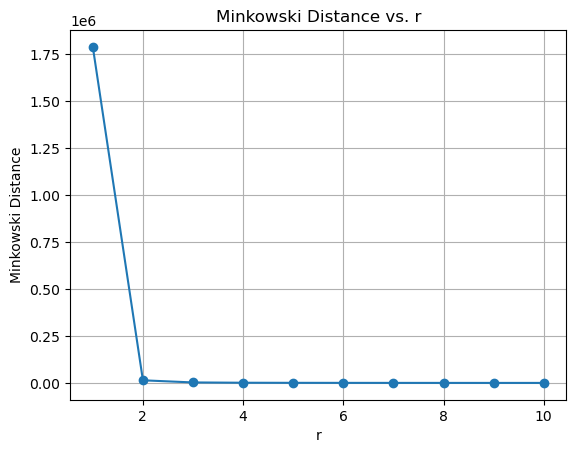

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


signal_strength = df['Signal Strength (dBm)'].to_numpy()
data_throughput = df['Data Throughput (Mbps)'].to_numpy()

r_values = list(range(1, 11))

distances = []

for r in r_values:
    distance = np.linalg.norm(signal_strength - data_throughput, ord=r)
    distances.append(distance)

plt.plot(r_values, distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

y=df.drop('Longitude',axis=1)
X=df['Longitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=48)


In [9]:
print(X_train.shape)
print(y_train.shape)

(8414,)
(8414, 11)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjusted the hyperparameter
knn_classifier.fit(X_train, y_train)

train_predictions = knn_classifier.predict(X_train)
test_predictions = knn_classifier.predict(X_test)

train_confusion_matrix = confusion_matrix(y_train, train_predictions)
train_classification_report = classification_report(y_train, train_predictions)

test_confusion_matrix = confusion_matrix(y_test, test_predictions)
test_classification_report = classification_report(y_test, test_predictions)

print("Confusion Matrix (Training Data):\n", train_confusion_matrix)
print("\nClassification Report (Training Data):\n", train_classification_report)

print("\nConfusion Matrix (Test Data):\n", test_confusion_matrix)
print("\nClassification Report (Test Data):\n", test_classification_report)

Confusion Matrix (Training Data):
 [[125   0   0   0   0   0   0   0   0   0]
 [  0 132   0   0   0   0   0   0   0   0]
 [  0   0 129   0   0   0   0   1   0   0]
 [  0   0   0 127   0   0   0   2   0   0]
 [  0   0   0   0 120   0   0   1   0   0]
 [  0   0   0   0   0 114   0   0   0   2]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   3   0   1   0   0   0   0 127   0]
 [  0   0   0   1   0   1   0   0   1 118]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       0.98      1.00      0.99       132
           2       1.00      0.99      1.00       130
           3       0.98      0.98      0.98       129
           4       1.00      0.99      1.00       121
           5       0.99      0.98      0.99       116
           6       1.00      1.00      1.00       128
           7       0.97      1.00      0.98       124
      

In [14]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
accuracy = neigh.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9888888888888889


In [16]:
predicted_labels = neigh.predict(X_test)
print (predicted_labels )

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 8 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 4 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 3 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 5 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2 9 3 9 9 3 7 7 1 3 